In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [757]:
raw_board= np.array([20, 1, 18, 4, 13, 6, 10, 15, 2, 17, 3, 19, 7, 16, 8, 11, 14, 9, 12, 5])

In [758]:
board_num = np.concatenate([raw_board, raw_board, raw_board])
print(board_num)

[20  1 18  4 13  6 10 15  2 17  3 19  7 16  8 11 14  9 12  5 20  1 18  4
 13  6 10 15  2 17  3 19  7 16  8 11 14  9 12  5 20  1 18  4 13  6 10 15
  2 17  3 19  7 16  8 11 14  9 12  5]


In [675]:
def calc_e(window=1, start_point=0, only_labels=False):
    to_return = []
    for i in range(start_point, 20+start_point, window):
        target = [board_num[i+j] for j in range(window)]
        exp = np.mean(target)
        member = map(str, target)
        member = '-'.join(member)
        if only_labels == False: 
            to_return.append([member, exp])
        else:
            to_return.append(member)
        
    return to_return

In [224]:
calc_e(20, 0)

[['20-1-18-4-13-6-10-15-2-17-3-19-7-16-8-11-14-9-12-5', 10.5]]

In [676]:
calc_e(20, 0, True)

['20-1-18-4-13-6-10-15-2-17-3-19-7-16-8-11-14-9-12-5']

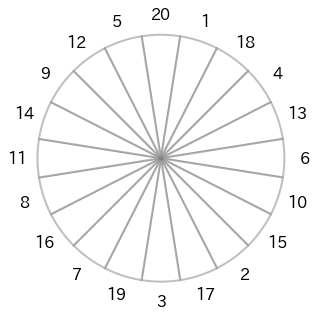

In [225]:
# http://pynote.hatenablog.com/entry/matplotlib-polor-projection
# https://scipy-lectures.org/intro/matplotlib/auto_examples/plot_polar.html
# https://fijixfiji.hatenadiary.jp/entry/20140303/1393859940

ax = plt.axes([0.1, 0.1, 0.9, 0.9], polar=True)
ax.set_theta_direction(-1) 
ax.set_theta_offset(0.5 * np.pi)

N = 20
theta = np.arange(0.0, 2 * np.pi, 2 * np.pi / N)
radii = np.full(N, 1)
# radii = np.linspace(0, 1, 20, endpoint=False)
width = np.pi / (N/2)
bars = plt.bar(theta, radii, width=width, bottom=0.0, linewidth=2, edgecolor='gray')
# bars = plt.bar(theta, board_num[:20], width=width, bottom=0.0, linewidth=2, edgecolor='gray')
angles = np.linspace(0, 360, 20, endpoint=False)

for r, bar in zip(radii, bars):
#     bar.set_facecolor(plt.cm.jet(r/10.))
    bar.set_facecolor('white')
    bar.set_alpha(0.5)

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_frame_on(False)
ax.grid(False)
# ax.set_rgrids([])
ax.set_thetagrids(angles, labels=board_num, fontsize=16)
plt.show()

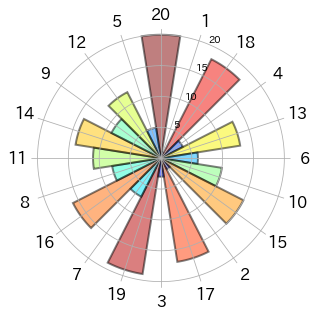

In [257]:
ax = plt.axes([0.1, 0.1, 0.9, 0.9], polar=True)
ax.set_theta_direction(-1) 
ax.set_theta_offset(0.5 * np.pi)

N = 20
width = np.pi / (N/2)
theta = np.arange(0.0, 2 * np.pi, 2 * np.pi / N)
radii = board_num[:20]
bars = plt.bar(theta, radii, width=width, bottom=0.0, linewidth=2, edgecolor='k')

for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r/20.))
    bar.set_alpha(0.5)

ax.set_frame_on(False)
ax.set_rgrids(np.linspace(5, 25, 4, endpoint=False))
ax.set_thetagrids(np.linspace(0, 360, 20, endpoint=False), labels=board_num, fontsize=16)
plt.show()

In [274]:
nums1 = calc_e(2)
nums2 = calc_e(2, 1)
print(nums1)
print(len(nums1))
print(nums2)

[['20-1', 10.5], ['18-4', 11.0], ['13-6', 9.5], ['10-15', 12.5], ['2-17', 9.5], ['3-19', 11.0], ['7-16', 11.5], ['8-11', 9.5], ['14-9', 11.5], ['12-5', 8.5]]
10
[['1-18', 9.5], ['4-13', 8.5], ['6-10', 8.0], ['15-2', 8.5], ['17-3', 10.0], ['19-7', 13.0], ['16-8', 12.0], ['11-14', 12.5], ['9-12', 10.5], ['5-20', 12.5]]


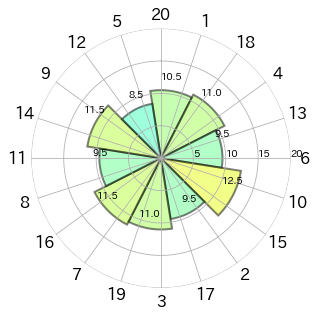

In [301]:
ax = plt.axes([0.1, 0.1, 0.9, 0.9], polar=True)
ax.set_theta_direction(-1) 
ax.set_theta_offset(0.5 * np.pi)

N = len(nums1)
width = np.pi / (N/2)
theta = np.arange( (np.pi / N)/2, 2*np.pi, 2*np.pi / N )
radii = [i[1] for i in nums1]
bars = plt.bar(theta, radii, width=width, bottom=0.0, linewidth=2, edgecolor='k')

for i, (r, bar) in enumerate(zip(radii, bars)):
    bar.set_facecolor(plt.cm.jet(r/20.))
    bar.set_alpha(0.5)
    ax.annotate(radii[i], (theta[i], radii[i]),
                xytext=(0, 10),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_frame_on(False)
ax.set_rgrids(np.linspace(5, 25, 4, endpoint=False), angle=90)
ax.set_thetagrids(np.linspace(0, 360, 20, endpoint=False), labels=board_num, fontsize=16)
plt.show()

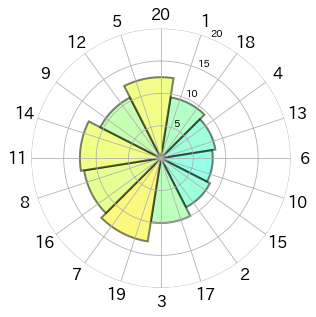

In [385]:
ax = plt.axes([0.1, 0.1, 0.9, 0.9], polar=True)
ax.set_theta_direction(-1) 
ax.set_theta_offset(0.5 * np.pi)

N = len(nums2)
width = np.pi / (N/2)
d = 2/2*np.pi / N
theta = np.arange( (np.pi / N)/2+d, 2*np.pi+d, 2*np.pi / N )
radii = [i[1] for i in nums2]
bars = plt.bar(theta, radii, width=width, bottom=0.0, linewidth=2, edgecolor='k')

for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r/20.))
    bar.set_alpha(0.5)

ax.set_frame_on(False)
ax.set_rgrids(np.linspace(5, 25, 4, endpoint=False))
ax.set_thetagrids(np.linspace(0, 360, 20, endpoint=False), labels=board_num, fontsize=16)
plt.show()

In [619]:
def plot(e, ax, mod=0):
    ax.set_theta_direction(-1) 
    ax.set_theta_offset(0.5 * np.pi)

    N = len(e)
    split = len(e[0][0].split('-'))
    width = 2*np.pi / N
    phi = width * (2*mod + split-1) / (2*split)
    theta = np.arange( phi, phi+2*np.pi, width )
    radii = [i[1] for i in e]
#     bbars = ax.bar(
#         np.arange( 0, 2*np.pi, 2*np.pi/20 ), np.full(20, 20), width=2*np.pi/20,
#         linewidth=2, edgecolor='gray', color='white')
    bars = ax.bar(theta, radii, width=width, bottom=0.0, linewidth=2, edgecolor='k')

#     for i, bar in enumerate(bbars):
#         t = np.arange( 0, 2*np.pi, 2*np.pi/20 )
#         ax.annotate(board_num[i], (t[i], 20), xytext=(t[i], 22), fontsize=16, ha='center', va='center')
    
    for i, (r, bar) in enumerate(zip(radii, bars)):
        bar.set_facecolor(plt.cm.jet(r/20.))
#         bar.set_alpha(0.5)
        ax.annotate('{:.1f}'.format(radii[i]), (theta[i], radii[i]),
                    xytext=(theta[i], radii[i]+2), color='blue',
                    ha='center', va='center')

    ax.set_frame_on(False)
    ax.set_rgrids(np.linspace(5, 25, 4, endpoint=False), angle=90, color='red')
#     ax.set_thetagrids([])
    ax.set_thetagrids(np.linspace(0, 360, 20, endpoint=False), labels=board_num, fontsize=12)

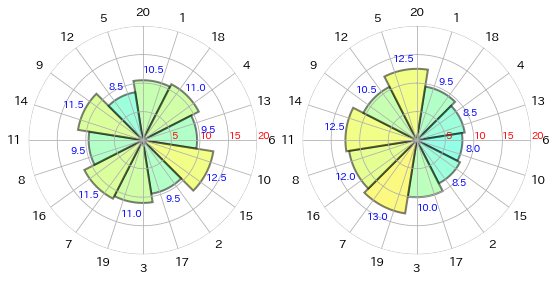

In [399]:
fig, ax = plt.subplots(1, 2, figsize=(9, 20), subplot_kw=dict(polar=True))
for i in range(2):
    plot(calc_e(2, i), ax[i], i)
    
plt.show()

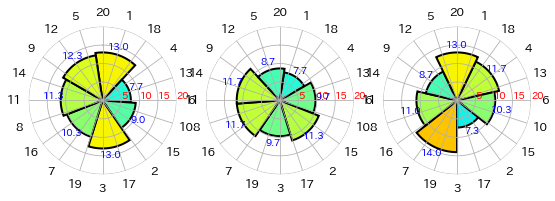

In [620]:
window = 3
fig, ax = plt.subplots(1, window, figsize=(9,12*window), subplot_kw=dict(polar=True))
for i in range(window):
    plot(calc_e(window, i), ax[i], i)
    
plt.show()

In [608]:
calc_e(3,0)

[['20-1-18', 13.0],
 ['4-13-6', 7.666666666666667],
 ['10-15-2', 9.0],
 ['17-3-19', 13.0],
 ['7-16-8', 10.333333333333334],
 ['11-14-9', 11.333333333333334],
 ['12-5-20', 12.333333333333334]]

In [609]:
calc_e(3, 1)

[['1-18-4', 7.666666666666667],
 ['13-6-10', 9.666666666666666],
 ['15-2-17', 11.333333333333334],
 ['3-19-7', 9.666666666666666],
 ['16-8-11', 11.666666666666666],
 ['14-9-12', 11.666666666666666],
 ['5-20-1', 8.666666666666666]]

In [610]:
calc_e(3, 2)

[['18-4-13', 11.666666666666666],
 ['6-10-15', 10.333333333333334],
 ['2-17-3', 7.333333333333333],
 ['19-7-16', 14.0],
 ['8-11-14', 11.0],
 ['9-12-5', 8.666666666666666],
 ['20-1-18', 13.0]]

In [612]:
calc_e(3, 3)

[['4-13-6', 7.666666666666667],
 ['10-15-2', 9.0],
 ['17-3-19', 13.0],
 ['7-16-8', 10.333333333333334],
 ['11-14-9', 11.333333333333334],
 ['12-5-20', 12.333333333333334],
 ['1-18-4', 7.666666666666667]]

In [613]:
calc_e(3, 4)

[['13-6-10', 9.666666666666666],
 ['15-2-17', 11.333333333333334],
 ['3-19-7', 9.666666666666666],
 ['16-8-11', 11.666666666666666],
 ['14-9-12', 11.666666666666666],
 ['5-20-1', 8.666666666666666],
 ['18-4-13', 11.666666666666666]]

In [614]:
calc_e(3, 5)

[['6-10-15', 10.333333333333334],
 ['2-17-3', 7.333333333333333],
 ['19-7-16', 14.0],
 ['8-11-14', 11.0],
 ['9-12-5', 8.666666666666666],
 ['20-1-18', 13.0],
 ['4-13-6', 7.666666666666667]]

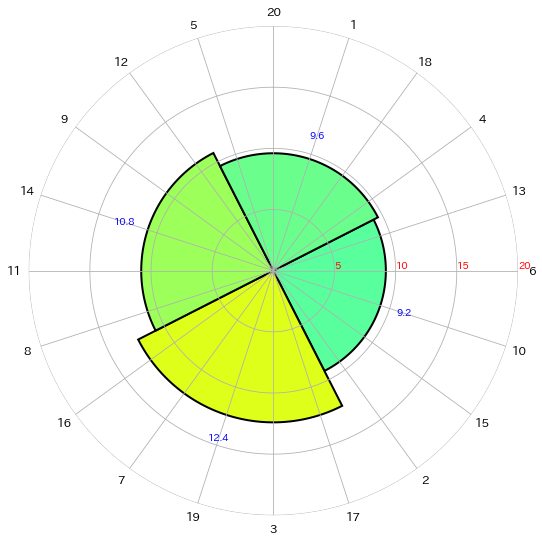

In [607]:
window = 5
mod = 4
fig, ax = plt.subplots(1, 1, figsize=(9,9), subplot_kw=dict(polar=True))
plot(calc_e(window, mod), ax, mod)
    
plt.show()

# mod0
# w=5, 4/10
# 4, 3/8
# 3, 2/6
# 2, 1/4
# 1, 0/2

# mod1
# 5, 6/10
# 4, 5/8
# 3, 4/6
# 2, 3/4
# (1, 2/2)

# mod2
# 5, 8/10
# 4, 7/8
# 3, 6/6
# (2, 5/4)
# (1, 4/2)

# mod3
# 5, 10/10
# 4, 9/8
# (3, 8/6)
# (2, 7/4)
# (1, 6/2)

# mod4
# 5, 12/10
# (4, 11/8)
# (3, 10/6)
# (2, 9/4)
# (1, 8/2)

#mod5
# 6, 15
# 5, 14
# 4, 13
# 3, 12
# 2, 11
# 1, 10

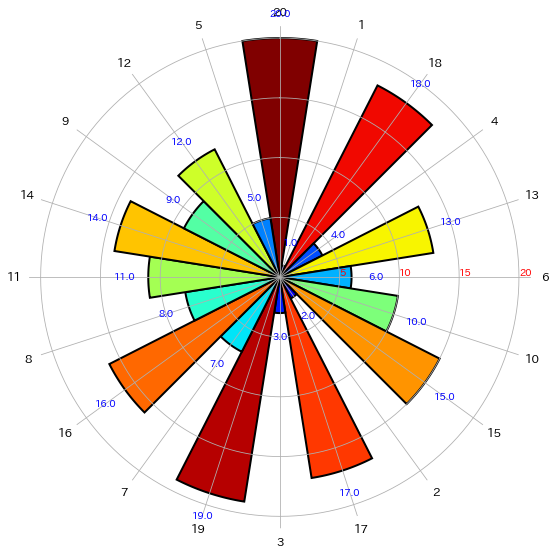

In [606]:
window = 1
fig, ax = plt.subplots(1, window, figsize=(9,12*window), subplot_kw=dict(polar=True))
for i in range(window):
    plot(calc_e(window, i), ax, i)
    
plt.show()

In [631]:
print(np.where(board_num==20)[0][0])

0


In [904]:
def plot_selected(raw_labels, ax):
    ax.set_theta_direction(-1) 
    ax.set_theta_offset(0.5 * np.pi)

    list_label = [list(map(int, label.split('-'))) for label in raw_labels]
    thetas = []
    radis = []
    widths = []
    for labels in list_label:
        split = len(labels)
        if split % 2 == 0:
            theta1 = np.where(board_num==labels[split//2 -1])[0][0] * 2*np.pi / 20
            theta2 = np.where(board_num==labels[split//2])[0][0] * 2*np.pi / 20
            if theta2 < theta1: theta2 = np.where(board_num==labels[split//2])[0][1] * 2*np.pi / 20
            theta = (theta1 + theta2)/2
        else:
            theta = np.where(board_num==labels[split//2])[0][0] * 2*np.pi / 20
        thetas.append(theta)
        widths.append(split * 2*np.pi / 20)
        radis.append(sum(labels) / split)
        
#     for r in range(5, 25, 5):
#         t = 2*np.arange( 0, 2*np.pi, 0.1)
#         ax.plot(t, np.full(t.shape, r), color='r', alpha=0.2)
    bbars = ax.bar(
        np.arange( 0, 2*np.pi, 2*np.pi/20 ), np.full(20, 20), width=2*np.pi/20,
        linewidth=1, edgecolor='lightgray', color='white')
    bars = ax.bar(thetas, radis, width=widths, bottom=0.0, linewidth=2, edgecolor='k')
    
    for i, bar in enumerate(bbars):
        t = np.arange( 0, 2*np.pi, 2*np.pi/20 )
        ax.annotate(board_num[i], (t[i], 20), xytext=(t[i], 24), fontsize=16, ha='center', va='center')
    for i, (r, bar) in enumerate(zip(radis, bars)):
        bar.set_facecolor(plt.cm.jet(r/20.))
        bar.set_alpha(0.5)
        ax.annotate('{}\n{:.1f}'.format(raw_labels[i], radis[i]), (thetas[i], radis[i]),
                    xytext=(thetas[i], radis[i]+2), color='b',
                    ha='center', va='center')

    ax.set_frame_on(False)
    ax.set_rgrids(np.linspace(5, 25, 4, endpoint=False), angle=88, color='r')
#     ax.set_rgrids(np.linspace(5, 25, 4, endpoint=False), ['exp: 5', '10', '15', '20'], angle=85, color='red')
    ax.set_thetagrids([])
#     ax.set_thetagrids(np.linspace(0, 360, 20, endpoint=False), labels=board_num, fontsize=12)

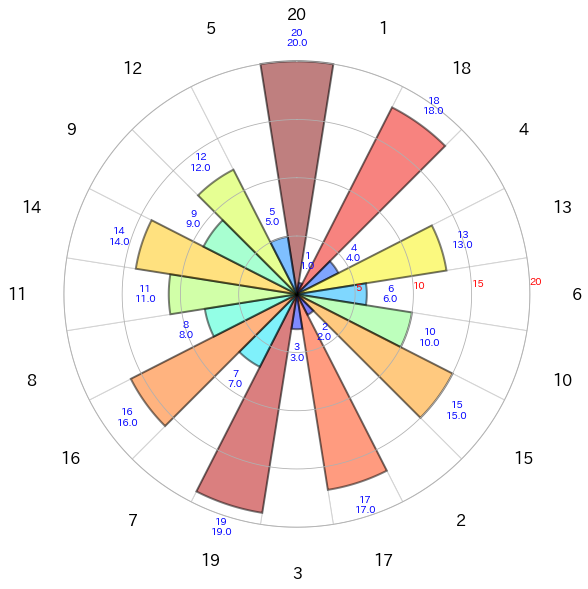

In [886]:
# a = ['20', '1-18-4', '19-7', '5-20-1']
# a = board_num.astype(str)
a = calc_e(3, 2, True)
a = calc_e(1, 0, True)
fig, ax = plt.subplots(1, 1, figsize=(9,9), subplot_kw=dict(polar=True))
plot_selected(a, ax)
plt.show()

In [765]:
def calc_e_ww(window=1):
    to_return = []
    for i, num in enumerate(raw_board):
        exp = 0
        for idx in range(window):
#             print(board_num[20+i-(window-1)+idx : 20+i+idx+1])
            exp += sum(board_num[20+i-(window-1)+idx : 20+i+idx+1])
        to_return.append([num, exp//window])
        
    return to_return

In [769]:
calc_e_ww(3)

[[20, 34],
 [1, 29],
 [18, 32],
 [4, 27],
 [13, 29],
 [6, 27],
 [10, 29],
 [15, 30],
 [2, 27],
 [17, 31],
 [3, 30],
 [19, 36],
 [7, 34],
 [16, 36],
 [8, 33],
 [11, 34],
 [14, 34],
 [9, 31],
 [12, 32],
 [5, 29]]

In [960]:
def plot_selected2(exp, ax):
    ax.set_theta_direction(-1) 
    ax.set_theta_offset(0.5 * np.pi)

    list_label = [e[0] for e in exp]
    thetas = np.arange( 0, 2*np.pi, 2*np.pi/20 )
    radis = [e[1] for e in exp]
    widths = 2*np.pi/20
        
#     for r in range(5, 25, 5):
#         t = 2*np.arange( 0, 2*np.pi, 0.1)
#         ax.plot(t, np.full(t.shape, r), color='r', alpha=0.2)
    bbars = ax.bar(
        np.arange( 0, 2*np.pi, 2*np.pi/20 ), np.full(20, 1), width=2*np.pi/20,
        linewidth=1, edgecolor='lightgray', color='white')
    bars = ax.bar(thetas, radis/max(radis), width=widths, bottom=0.0, linewidth=2, edgecolor='k')
    
    for i, bar in enumerate(bbars): # board num
        t = np.arange( 0, 2*np.pi, 2*np.pi/20 )
        ax.annotate(board_num[i], (t[i], 1), xytext=(t[i], 1.2), fontsize=16, ha='center', va='center')
    for i, (r, bar) in enumerate(zip(radis, bars)): # bar
        bar.set_facecolor(plt.cm.jet(r/max(radis)))
        bar.set_alpha(0.5)
        if r != 0.01:
            ax.annotate('{}\n{:.1f}'.format(list_label[i], radis[i]), (thetas[i], radis[i]/max(radis)),
                        xytext=(thetas[i], radis[i]/max(radis)+0.1), color='b',
                        ha='center', va='center')

    ax.set_frame_on(False)
#     ax.set_rgrids(np.linspace(5, 25, 4, endpoint=False), angle=90, color='red')
    ax.set_rgrids(np.linspace(0.25, 1.25, 4, endpoint=False), 
                  np.linspace(0.25*max(radis), 1.25*max(radis), 4, endpoint=False).astype(str),
                  angle=88, color='r')
    ax.set_thetagrids([])
#     ax.set_thetagrids(np.linspace(0, 360, 20, endpoint=False), labels=board_num, fontsize=12)

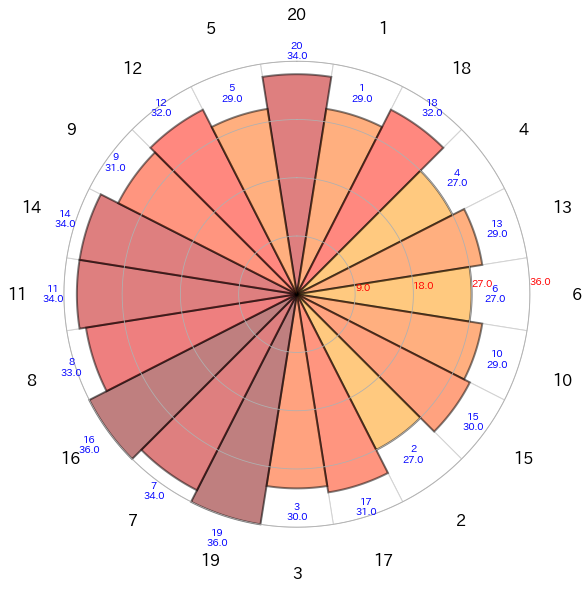

In [933]:
fig, ax = plt.subplots(1, 1, figsize=(9,9), subplot_kw=dict(polar=True))
plot_selected2(calc_e_ww(3), ax)
plt.show()

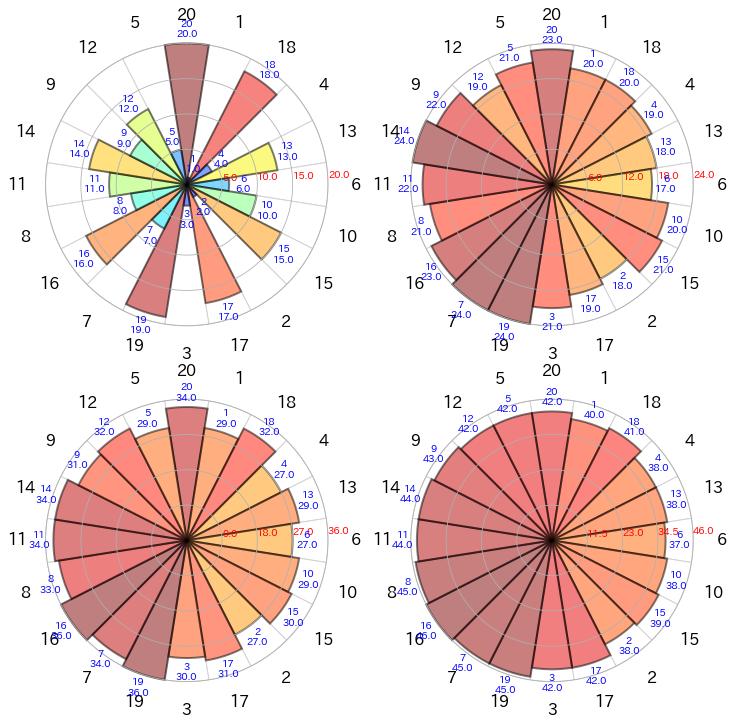

In [912]:
num = 4
fig, ax = plt.subplots(2, 2, figsize=(12,12), subplot_kw=dict(polar=True))
for i in range(num):
    plot_selected2(calc_e_ww(i+1), ax[i//2, i%2])
plt.show()

In [982]:
from matplotlib.patches import ConnectionPatch

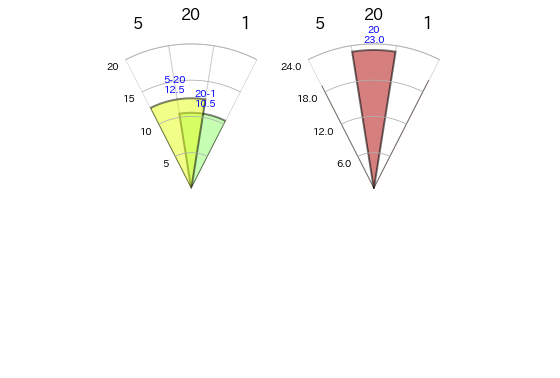

In [1015]:
fig, ax = plt.subplots(1, 2, figsize=(6,18), subplot_kw=dict(polar=True))
plot_selected(['20-1', '5-20'], ax[0])
ax[0].set_thetamin(-1.5*360/20)
ax[0].set_thetamax(1.5*360/20)

i = 1
a = calc_e_ww(2)
a[1] = [13, 0.01]
a[-1] = [13, 0.01]
plot_selected2(a, ax[i])
ax[i].set_thetamin(-1.5*360/20)
ax[i].set_thetamax(1.5*360/20)

# xy = (0, 100)
# con = ConnectionPatch(xyA=xy, xyB=xy, coordsA="polar", coordsB="polar", axesA=ax, axesB=ax2)
# ax2.add_artist(con)

# i = 1
# bbox_props = dict(boxstyle="rarrow, pad=0.3", fc="cyan", ec="b", lw=2)
# ax[i].text(0, 0, "Add", ha="center", va="center", rotation=0, size=15, bbox=bbox_props)
# ax[i].set_axis_off()

plt.show()